In [21]:
import numpy as np
from scipy.interpolate import interpn

class GridInterpolator:
    def __init__(me, F_grid, grid_min, grid_max):
        me.F_grid = F_grid
        me.grid_min = grid_min
        me.grid_max = grid_max
        me.grid_shape = me.F_grid.shape
        me.d = len(me.grid_shape)
        
        me.all_xx = tuple([np.linspace(me.grid_min[i], 
                                       me.grid_max[i], 
                                       me.grid_shape[i]) for i in range(me.d)])
        
    def interpolate(me, points_array_pp, fill_value=0.0, method='linear'):
        return interpn(me.all_xx, me.F_grid, points_array_pp, 
                       bounds_error=False, fill_value=fill_value, method=method)

# Test

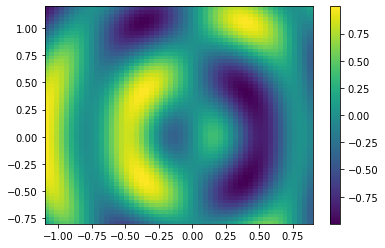

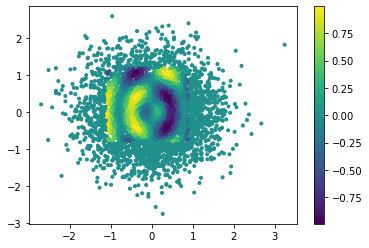

In [32]:
import matplotlib.pyplot as plt

nx = 55
ny = 63

grid_min = np.array([-1.1, -0.8])
grid_max = np.array([0.9, 1.2])

xx0 = np.linspace(grid_min[0], grid_max[0], nx)
yy0 = np.linspace(grid_min[1], grid_max[1], ny)

X0, Y0 = np.meshgrid(xx0, yy0, indexing='ij')
F_grid = np.sin(1.3*np.pi*X0)*np.cos(1.8*np.pi*np.sqrt(X0**2 + Y0**2))

plt.pcolor(X0, Y0, F_grid)
plt.colorbar()

pp = 0.75 * np.random.randn(5000, 2)

F_interpolator = GridInterpolator(F_grid, grid_min, grid_max)

ff = F_interpolator.interpolate(pp)

plt.figure()
plt.scatter(pp[:,0], pp[:,1], c=ff, marker='.')
plt.colorbar()